In [2]:
# Import des librairies essentielles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Lecture du dataset
df = pd.read_csv("ai_job_trends_dataset.csv")

# Aperçu rapide
print("Dimensions :", df.shape)
display(df.head(5))


Dimensions : (30000, 13)


Job Title       Industry  Job Status AI Impact Level  \
0     Investment analyst             IT  Increasing        Moderate   
1  Journalist, newspaper  Manufacturing  Increasing        Moderate   
2      Financial planner        Finance  Increasing             Low   
3        Legal secretary     Healthcare  Increasing            High   
4  Aeronautical engineer             IT  Increasing             Low   

   Median Salary (USD) Required Education  Experience Required (Years)  \
0             42109.76    Master’s Degree                            5   
1            132298.57    Master’s Degree                           15   
2            143279.19  Bachelor’s Degree                            4   
3             97576.13   Associate Degree                           15   
4             60956.63    Master’s Degree                           13   

   Job Openings (2024)  Projected Openings (2030)  Remote Work Ratio (%)  \
0                 1515                       6342                  55.96   
1                 1243                       6205                  16.81   
2                 3338                       1154                  91.82   
3                 7173                       4060                   1.89   
4                 5944                       7396                  53.76   

   Automation Risk (%)   Location  Gender Diversity (%)  
0                28.28         UK                 44.63  
1                89.71        USA                 66.39  
2                72.97     Canada                 41.13  
3                99.94  Australia                 65.76  
4                37.65    Germany                 72.57

In [3]:
# Types de données et valeurs manquantes
df.info()

# Statistiques de base
display(df.describe(include="all").T)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job Title                    30000 non-null  object 
 1   Industry                     30000 non-null  object 
 2   Job Status                   30000 non-null  object 
 3   AI Impact Level              30000 non-null  object 
 4   Median Salary (USD)          30000 non-null  float64
 5   Required Education           30000 non-null  object 
 6   Experience Required (Years)  30000 non-null  int64  
 7   Job Openings (2024)          30000 non-null  int64  
 8   Projected Openings (2030)    30000 non-null  int64  
 9   Remote Work Ratio (%)        30000 non-null  float64
 10  Automation Risk (%)          30000 non-null  float64
 11  Location                     30000 non-null  object 
 12  Gender Diversity (%)         30000 non-null  float64
dtypes: float64(4), i

count unique                  top   freq  \
Job Title                      30000    639  Surveyor, insurance     75   
Industry                       30000      8        Entertainment   3895   
Job Status                     30000      2           Increasing  15136   
AI Impact Level                30000      3             Moderate  10042   
Median Salary (USD)          30000.0    NaN                  NaN    NaN   
Required Education             30000      5    Bachelor’s Degree   6146   
Experience Required (Years)  30000.0    NaN                  NaN    NaN   
Job Openings (2024)          30000.0    NaN                  NaN    NaN   
Projected Openings (2030)    30000.0    NaN                  NaN    NaN   
Remote Work Ratio (%)        30000.0    NaN                  NaN    NaN   
Automation Risk (%)          30000.0    NaN                  NaN    NaN   
Location                       30000      8            Australia   3802   
Gender Diversity (%)         30000.0    NaN                  NaN    NaN   

                                     mean           std       min         25%  \
Job Title                             NaN           NaN       NaN         NaN   
Industry                              NaN           NaN       NaN         NaN   
Job Status                            NaN           NaN       NaN         NaN   
AI Impact Level                       NaN           NaN       NaN         NaN   
Median Salary (USD)          90119.965639  34412.013953  30001.86  60500.7025   
Required Education                    NaN           NaN       NaN         NaN   
Experience Required (Years)     10.051433      6.060678       0.0         5.0   
Job Openings (2024)           5039.640833   2861.009654     100.0      2570.0   
Projected Openings (2030)       5074.2181   2866.550722     100.0     2586.75   
Remote Work Ratio (%)           49.836431     28.966688       0.0       24.57   
Automation Risk (%)             50.154229     28.754889       0.0        25.4   
Location                              NaN           NaN       NaN         NaN   
Gender Diversity (%)             49.97966     17.274665      20.0       35.07   

                                   50%        75%       max  
Job Title                          NaN        NaN       NaN  
Industry                           NaN        NaN       NaN  
Job Status                         NaN        NaN       NaN  
AI Impact Level                    NaN        NaN       NaN  
Median Salary (USD)          90274.115  119454.71  149998.5  
Required Education                 NaN        NaN       NaN  
Experience Required (Years)       10.0       15.0      20.0  
Job Openings (2024)             5034.0     7527.0   10000.0  
Projected Openings (2030)       5106.5     7573.0   10000.0  
Remote Work Ratio (%)            49.57       75.1     100.0  
Automation Risk (%)              50.02      75.03     99.99  
Location                           NaN        NaN       NaN  
Gender Diversity (%)            49.885      64.91      80.0

In [4]:
# Standardiser les noms de colonnes
df.columns = [c.strip().replace(" ", "_").replace("(", "").replace(")", "") for c in df.columns]

# Vérifier doublons
print("Doublons :", df.duplicated().sum())
df = df.drop_duplicates()

# Vérifier les valeurs manquantes
missing = df.isnull().sum()
print("Valeurs manquantes par colonne :\n", missing[missing > 0])


Doublons : 0
Valeurs manquantes par colonne :
 Series([], dtype: int64)


In [6]:
# Pourcentage entre 0 et 100
percent_cols = ["Remote_Work_Ratio_%","Automation_Risk_%","Gender_Diversity_%"]
for col in percent_cols:
    df[col] = df[col].clip(lower=0, upper=100)

# Aucune valeur négative dans les colonnes numériques
for col in num_cols:
    if (df[col] < 0).any():
        print(f"⚠️ Valeurs négatives détectées dans {col}")


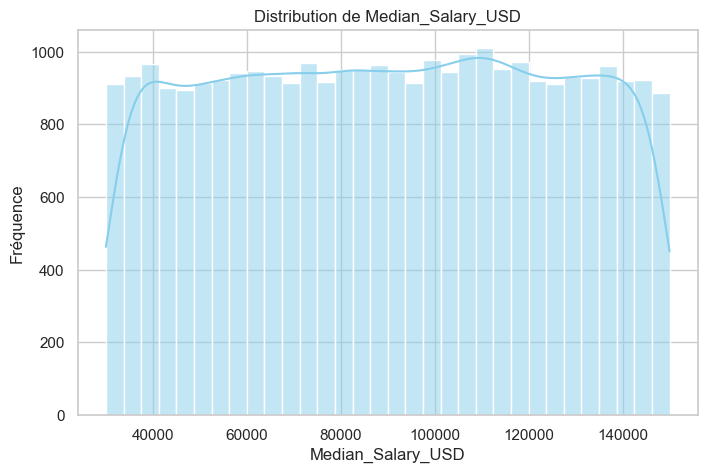

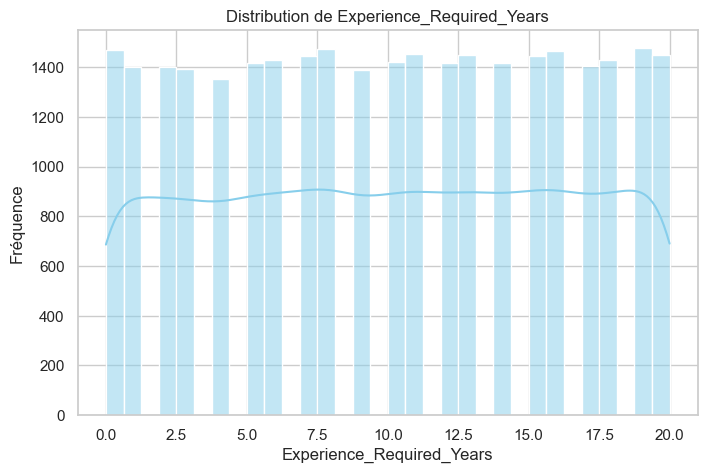

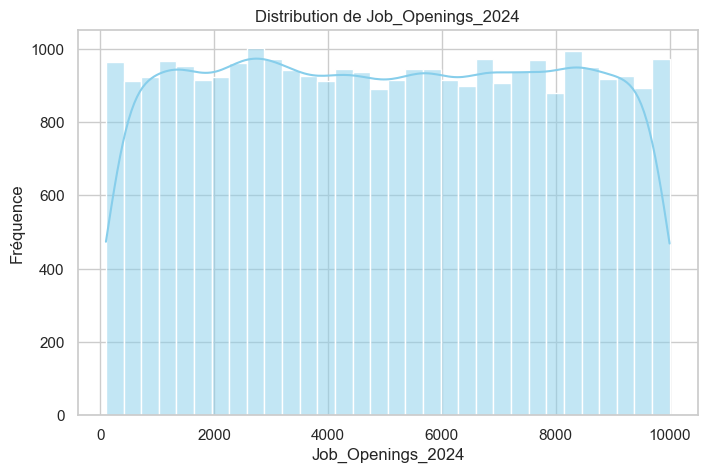

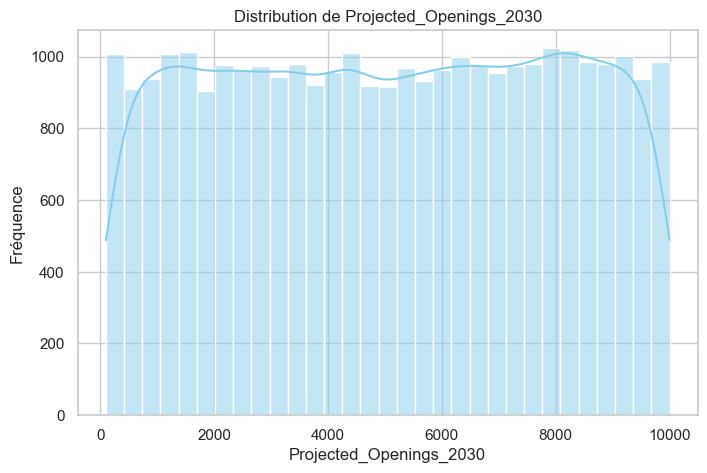

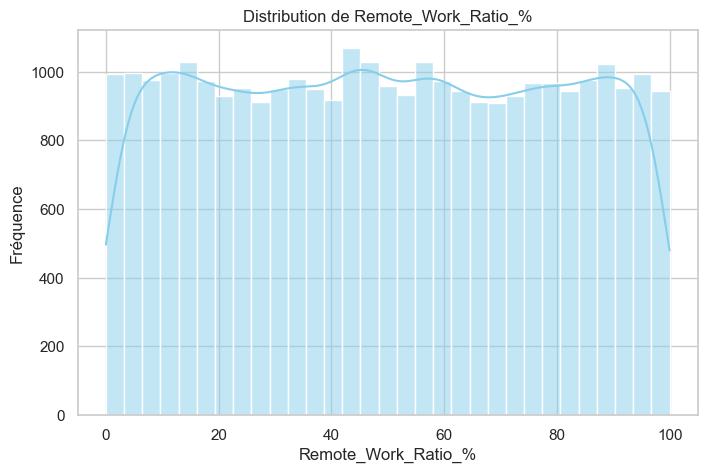

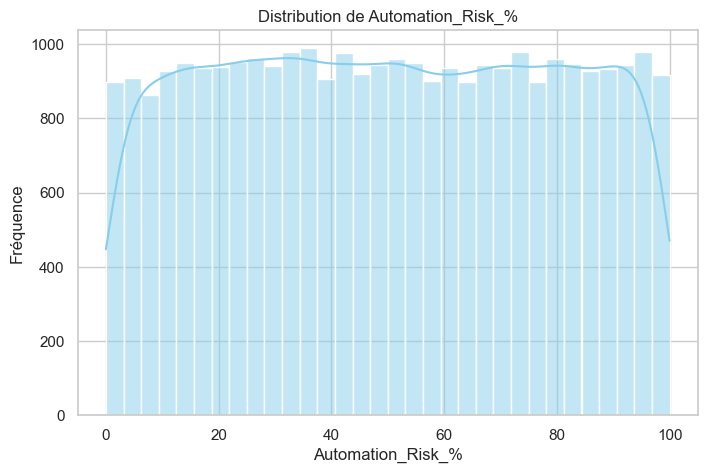

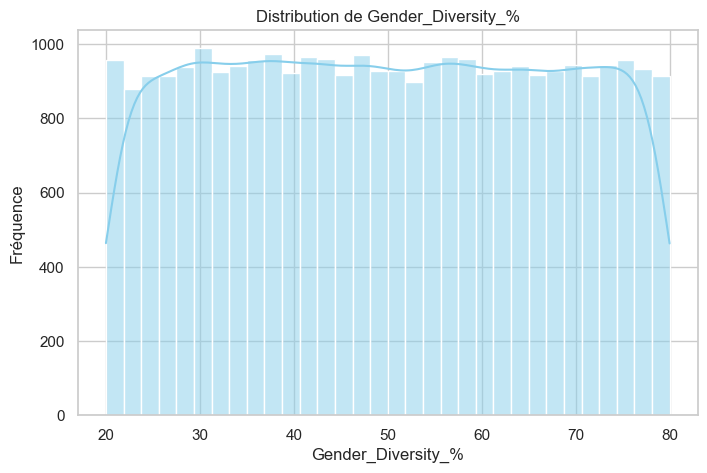

In [8]:
#. Histogrammes des variables numériques
num_cols = df.select_dtypes(include=[np.number]).columns

for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.show()


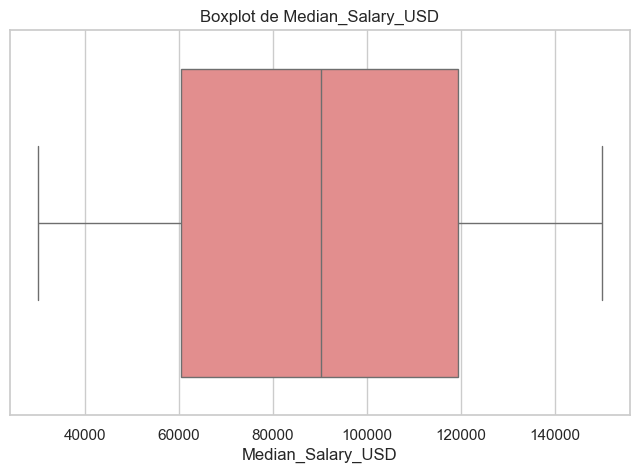

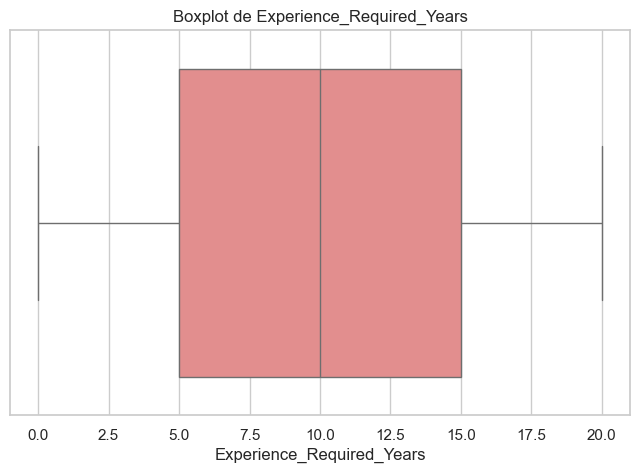

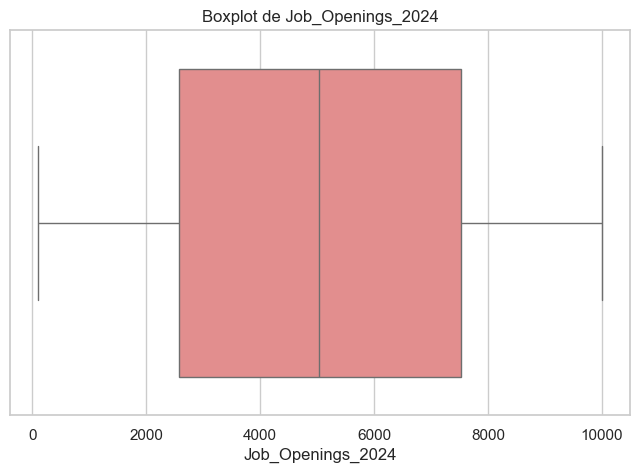

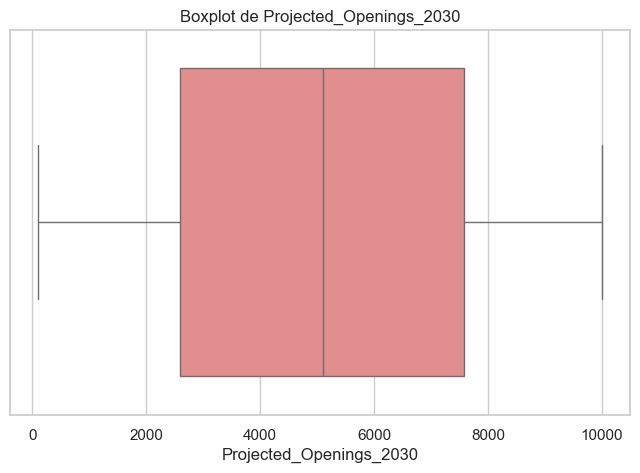

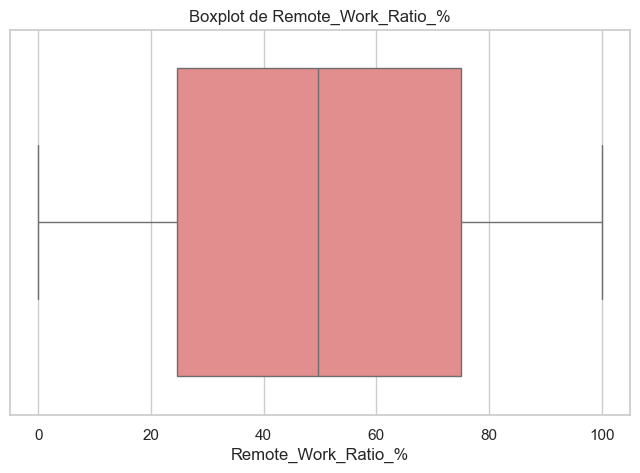

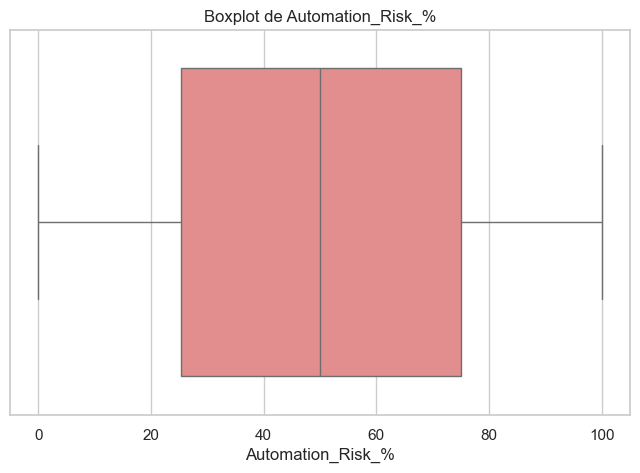

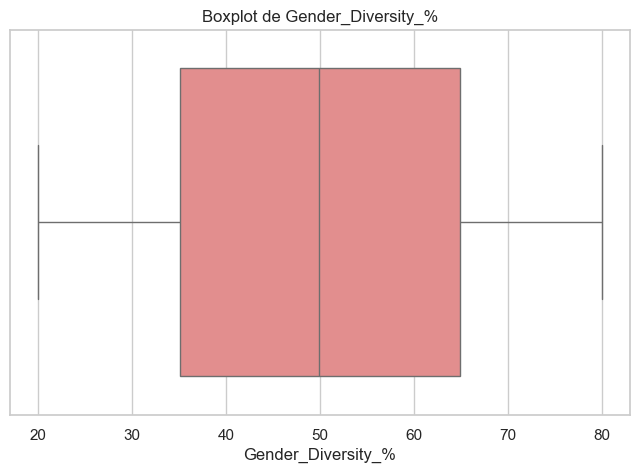

In [9]:
for col in num_cols:
    plt.figure()
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f"Boxplot de {col}")
    plt.show()


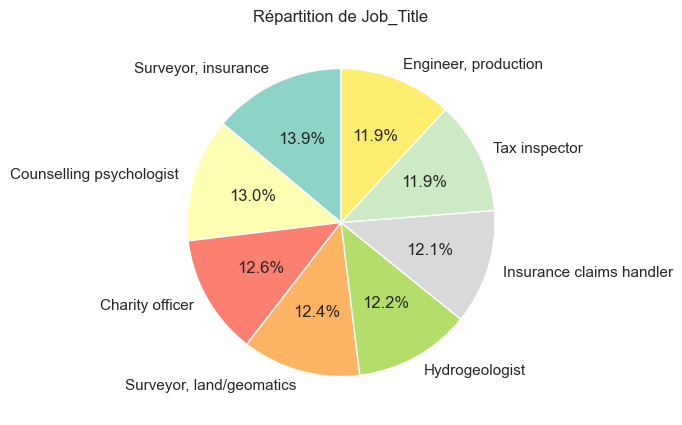

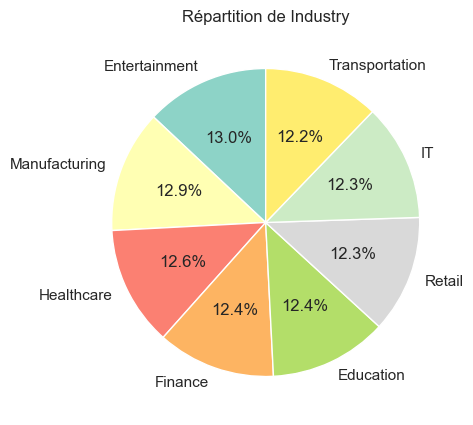

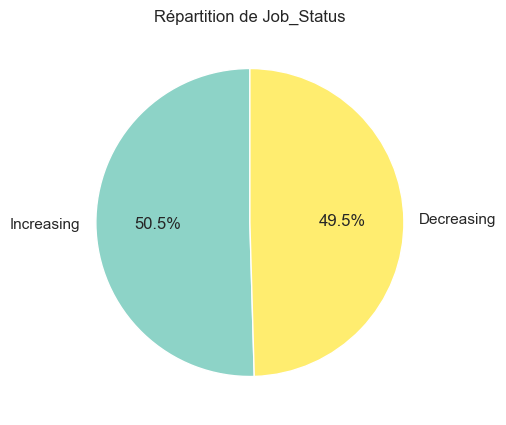

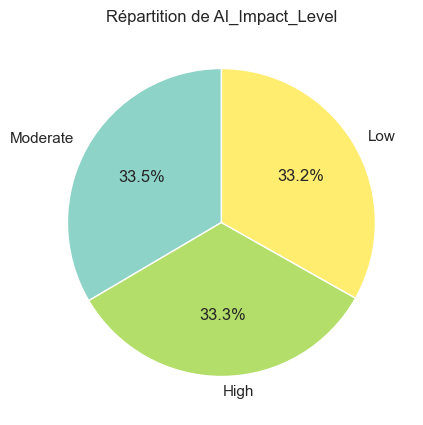

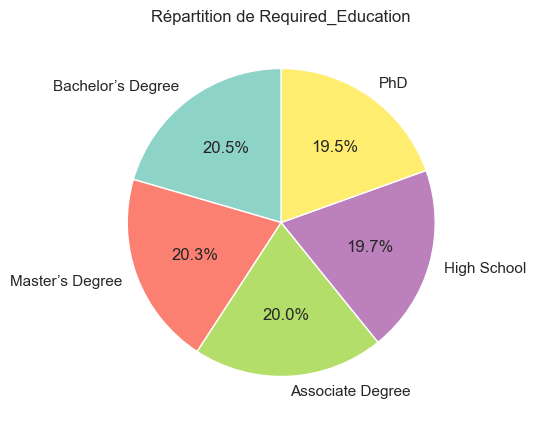

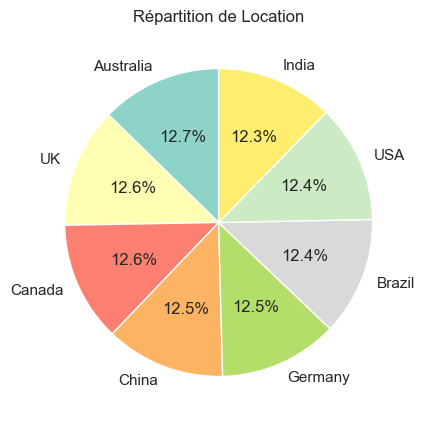

In [10]:
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    plt.figure()
    df[col].value_counts().head(8).plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
    plt.title(f"Répartition de {col}")
    plt.ylabel("")
    plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_10340\903554256.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AI_Impact_Level', y='Median_Salary_USD', data=df, palette='Set2')


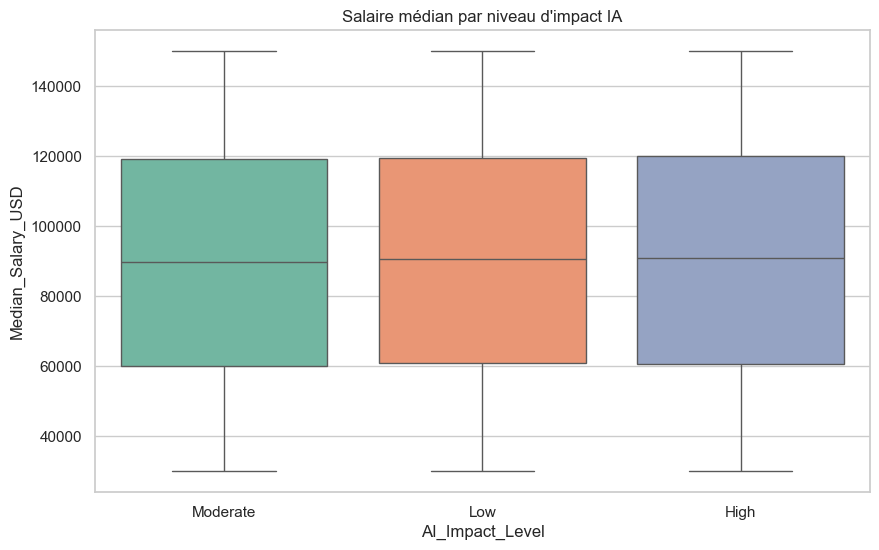

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(x='AI_Impact_Level', y='Median_Salary_USD', data=df, palette='Set2')
plt.title("Salaire médian par niveau d'impact IA")
plt.show()


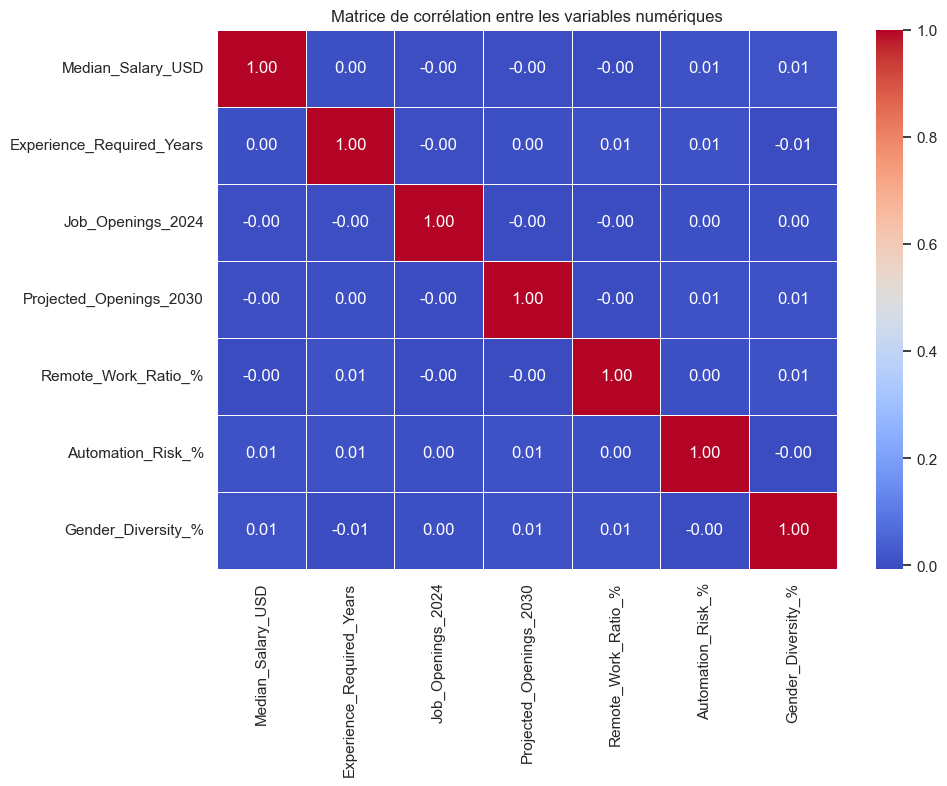

In [12]:
plt.figure(figsize=(10,7))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Matrice de corrélation entre les variables numériques")
plt.show()


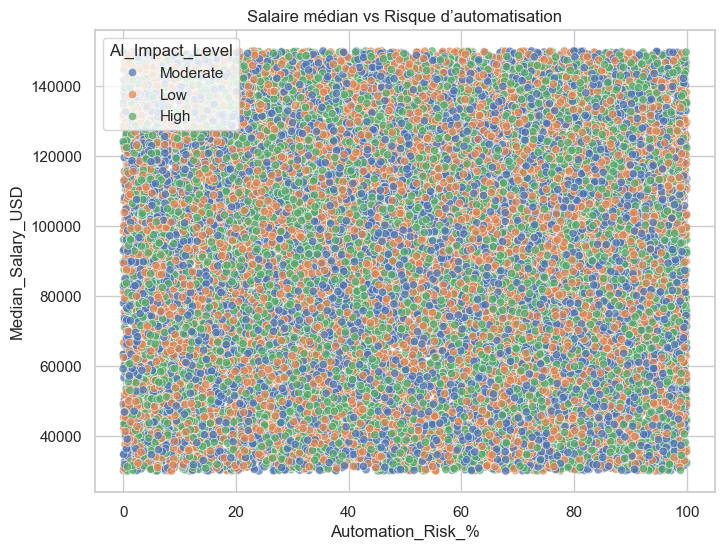

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Automation_Risk_%', y='Median_Salary_USD', hue='AI_Impact_Level', data=df, alpha=0.7)
plt.title("Salaire médian vs Risque d’automatisation")
plt.show()


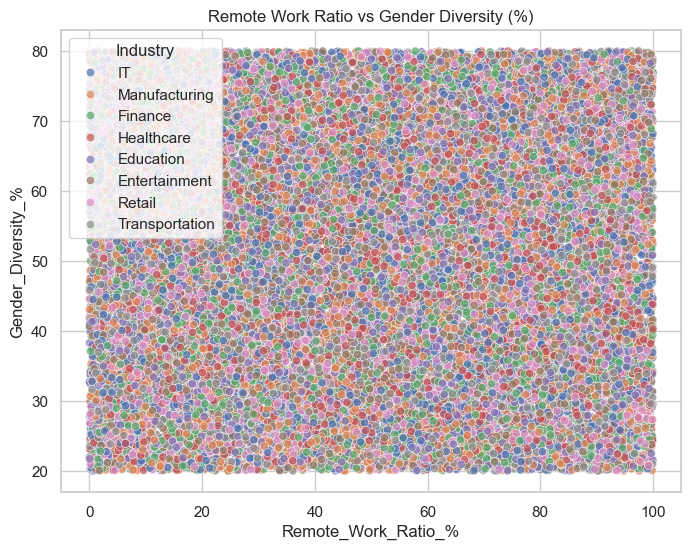

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Remote_Work_Ratio_%', y='Gender_Diversity_%', hue='Industry', data=df, alpha=0.7)
plt.title("Remote Work Ratio vs Gender Diversity (%)")
plt.show()


In [ ]:
#Nettoie les noms de colonnes : supprime espaces et parenthèses → pas de KeyError.

Crée une nouvelle feature : Job_Growth_Rate_% = taux de croissance des jobs entre 2024 et 2030.

Supprime les colonnes redondantes : Job_Openings_2024 et Projected_Openings_2030.

Encodage One-Hot pour toutes les variables catégorielles.

Standardisation des colonnes numériques (moyenne 0, écart-type 1).

Retourne un DataFrame prêt pour PCA ou ML, sans erreur de nom de colonne.




    Nettoyage des colonnes → plus de problèmes de KeyError.

Création d’une nouvelle feature Job_Growth_Rate_% → indicateur utile pour ML/PCA.

Suppression des colonnes redondantes → évite la multicolinéarité.

Encodage One-Hot des variables catégorielles → les modèles ML peuvent comprendre ces données.

Standardisation des variables numériques → toutes sur la même échelle (moyenne 0, écart-type

In [19]:
# ======= 1. Import =======
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# ======= 2. Nettoyage des noms de colonnes =======
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")
print("Colonnes après nettoyage :", df.columns.tolist())

# ======= 3. Copie du DataFrame =======
df_fe = df.copy()

# ======= 4. Feature dérivée : croissance du nombre d’emplois =======
df_fe["Job_Growth_Rate_%"] = ((df_fe["Projected_Openings_2030"] - df_fe["Job_Openings_2024"]) 
                              / df_fe["Job_Openings_2024"]) * 100

# ======= 5. Suppression des colonnes redondantes =======
df_fe.drop(columns=["Job_Openings_2024", "Projected_Openings_2030"], inplace=True)

# ======= 6. Identifier types de colonnes =======
num_cols = df_fe.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_cols = df_fe.select_dtypes(include=['object']).columns.tolist()

print("Colonnes numériques :", num_cols)
print("Colonnes catégorielles :", cat_cols)

# ======= 7. Création du préprocesseur =======
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

# ======= 8. Application du préprocessing =======
X_prepared = preprocessor.fit_transform(df_fe)

# ======= 9. Reconstruction du DataFrame transformé =======
num_features = num_cols
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols)
all_features = list(num_features) + list(cat_features)

df_ready = pd.DataFrame(X_prepared, columns=all_features)

print("✅ Données transformées — prêtes pour PCA / Modélisation")
print(df_ready.shape)
df_ready.head()


Colonnes après nettoyage : ['Job_Title', 'Industry', 'Job_Status', 'AI_Impact_Level', 'Median_Salary_USD', 'Required_Education', 'Experience_Required_Years', 'Job_Openings_2024', 'Projected_Openings_2030', 'Remote_Work_Ratio_%', 'Automation_Risk_%', 'Location', 'Gender_Diversity_%']
Colonnes numériques : ['Median_Salary_USD', 'Experience_Required_Years', 'Remote_Work_Ratio_%', 'Automation_Risk_%', 'Gender_Diversity_%', 'Job_Growth_Rate_%']
Colonnes catégorielles : ['Job_Title', 'Industry', 'Job_Status', 'AI_Impact_Level', 'Required_Education', 'Location']
✅ Données transformées — prêtes pour PCA / Modélisation
(30000, 665)


Median_Salary_USD  Experience_Required_Years  Remote_Work_Ratio_%  \
0          -1.395182                  -0.833491             0.211404   
1           1.225715                   0.816517            -1.140171   
2           1.544813                  -0.998491             1.449398   
3           0.216677                   0.816517            -1.655254   
4          -0.847490                   0.486516             0.135453   

   Automation_Risk_%  Gender_Diversity_%  Job_Growth_Rate_%  \
0          -0.760726           -0.309688           0.319017   
1           1.375642            0.949982           0.463781   
2           0.793470           -0.512300          -0.370909   
3           1.731413            0.913511          -0.331333   
4          -0.434863            1.307737          -0.209483   

   Job_Title_Accommodation manager  Job_Title_Accountant, chartered  \
0                              0.0                              0.0   
1                              0.0                              0.0   
2                              0.0                              0.0   
3                              0.0                              0.0   
4                              0.0                              0.0   

   Job_Title_Accountant, chartered certified  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   Job_Title_Accountant, chartered management  ...  \
0                                         0.0  ...   
1                                         0.0  ...   
2                                         0.0  ...   
3                                         0.0  ...   
4                                         0.0  ...   

   Required_Education_High School  Required_Education_Master’s Degree  \
0                             0.0                                 1.0   
1                             0.0                                 1.0   
2                             0.0                                 0.0   
3                             0.0                                 0.0   
4                             0.0                                 1.0   

   Required_Education_PhD  Location_Brazil  Location_Canada  Location_China  \
0                     0.0              0.0              0.0             0.0   
1                     0.0              0.0              0.0             0.0   
2                     0.0              0.0              1.0             0.0   
3                     0.0              0.0              0.0             0.0   
4                     0.0              0.0              0.0             0.0   

   Location_Germany  Location_India  Location_UK  Location_USA  
0               0.0             0.0          1.0           0.0  
1               0.0             0.0          0.0           1.0  
2               0.0             0.0          0.0           0.0  
3               0.0             0.0          0.0           0.0  
4               1.0             0.0          0.0           0.0  

[5 rows x 665 columns]

In [20]:
# Vérifier le DataFrame final
print(df_ready.shape)
df_ready.head()


(30000, 665)


Median_Salary_USD  Experience_Required_Years  Remote_Work_Ratio_%  \
0          -1.395182                  -0.833491             0.211404   
1           1.225715                   0.816517            -1.140171   
2           1.544813                  -0.998491             1.449398   
3           0.216677                   0.816517            -1.655254   
4          -0.847490                   0.486516             0.135453   

   Automation_Risk_%  Gender_Diversity_%  Job_Growth_Rate_%  \
0          -0.760726           -0.309688           0.319017   
1           1.375642            0.949982           0.463781   
2           0.793470           -0.512300          -0.370909   
3           1.731413            0.913511          -0.331333   
4          -0.434863            1.307737          -0.209483   

   Job_Title_Accommodation manager  Job_Title_Accountant, chartered  \
0                              0.0                              0.0   
1                              0.0                              0.0   
2                              0.0                              0.0   
3                              0.0                              0.0   
4                              0.0                              0.0   

   Job_Title_Accountant, chartered certified  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   Job_Title_Accountant, chartered management  ...  \
0                                         0.0  ...   
1                                         0.0  ...   
2                                         0.0  ...   
3                                         0.0  ...   
4                                         0.0  ...   

   Required_Education_High School  Required_Education_Master’s Degree  \
0                             0.0                                 1.0   
1                             0.0                                 1.0   
2                             0.0                                 0.0   
3                             0.0                                 0.0   
4                             0.0                                 1.0   

   Required_Education_PhD  Location_Brazil  Location_Canada  Location_China  \
0                     0.0              0.0              0.0             0.0   
1                     0.0              0.0              0.0             0.0   
2                     0.0              0.0              1.0             0.0   
3                     0.0              0.0              0.0             0.0   
4                     0.0              0.0              0.0             0.0   

   Location_Germany  Location_India  Location_UK  Location_USA  
0               0.0             0.0          1.0           0.0  
1               0.0             0.0          0.0           1.0  
2               0.0             0.0          0.0           0.0  
3               0.0             0.0          0.0           0.0  
4               1.0             0.0          0.0           0.0  

[5 rows x 665 columns]

In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
# PCA pour expliquer 95% de la variance
pca = PCA(n_components=0.95)  
X_pca = pca.fit_transform(df_ready)

print("Nombre de composantes conservées :", X_pca.shape[1])


Nombre de composantes conservées : 313


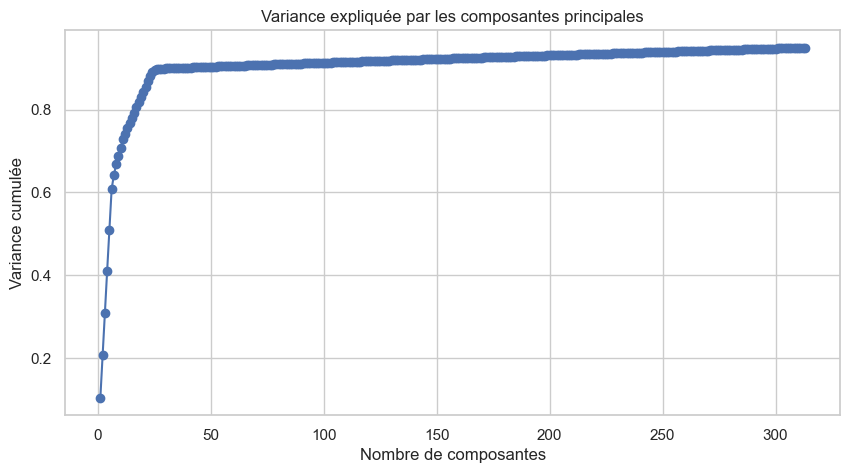

In [23]:
# Variance expliquée par chaque composante
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='o')
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance cumulée')
plt.title('Variance expliquée par les composantes principales')
plt.grid(True)
plt.show()


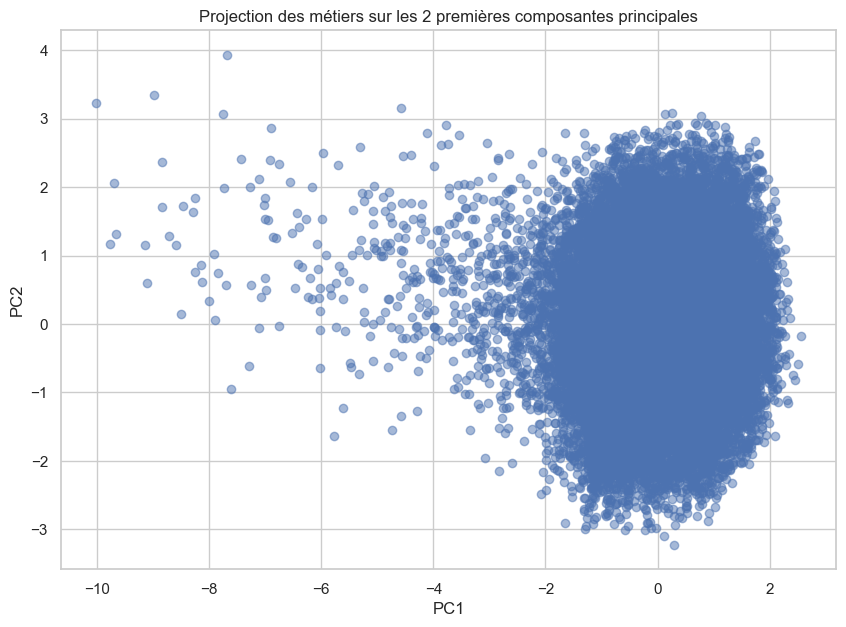

In [24]:
plt.figure(figsize=(10,7))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection des métiers sur les 2 premières composantes principales')
plt.grid(True)
plt.show()


In [25]:
# Contribution des features à la PC1 et PC2
pca_features = pd.DataFrame(pca.components_[:2], columns=df_ready.columns, index=['PC1','PC2']).T
pca_features.sort_values(by='PC1', ascending=False).head(10)  # top 10 features PC1


PC1       PC2
Gender_Diversity_%                    0.670168  0.010687
Remote_Work_Ratio_%                   0.316487  0.376601
Median_Salary_USD                     0.247089  0.362152
Industry_Retail                       0.004996 -0.002333
Required_Education_Master’s Degree    0.003870  0.003909
Industry_Transportation               0.003212  0.000904
Location_UK                           0.003185  0.000018
Industry_Manufacturing                0.002766 -0.000441
Location_Germany                      0.002099 -0.000672
Required_Education_Bachelor’s Degree  0.001042 -0.003728

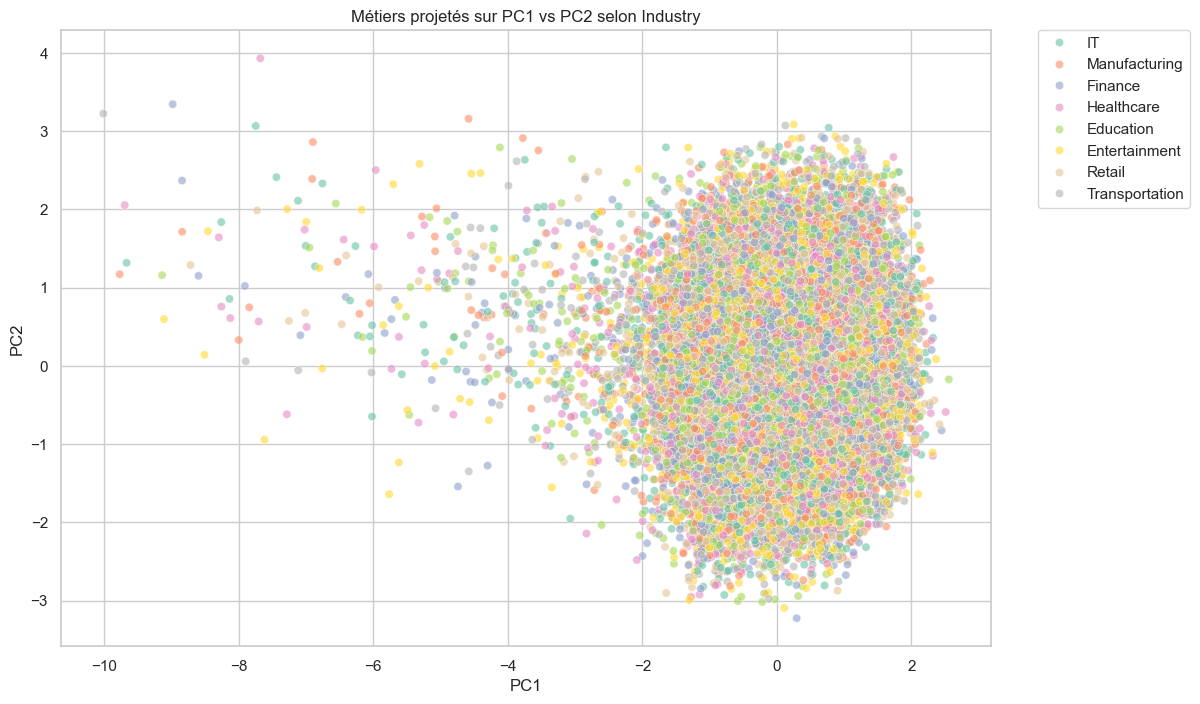

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pour colorer selon l'Industry
# Remarque : on utilise le DataFrame original df_fe pour garder les labels
plt.figure(figsize=(12,8))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], 
                hue=df_fe['Industry'], alpha=0.6, palette='Set2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Métiers projetés sur PC1 vs PC2 selon Industry')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


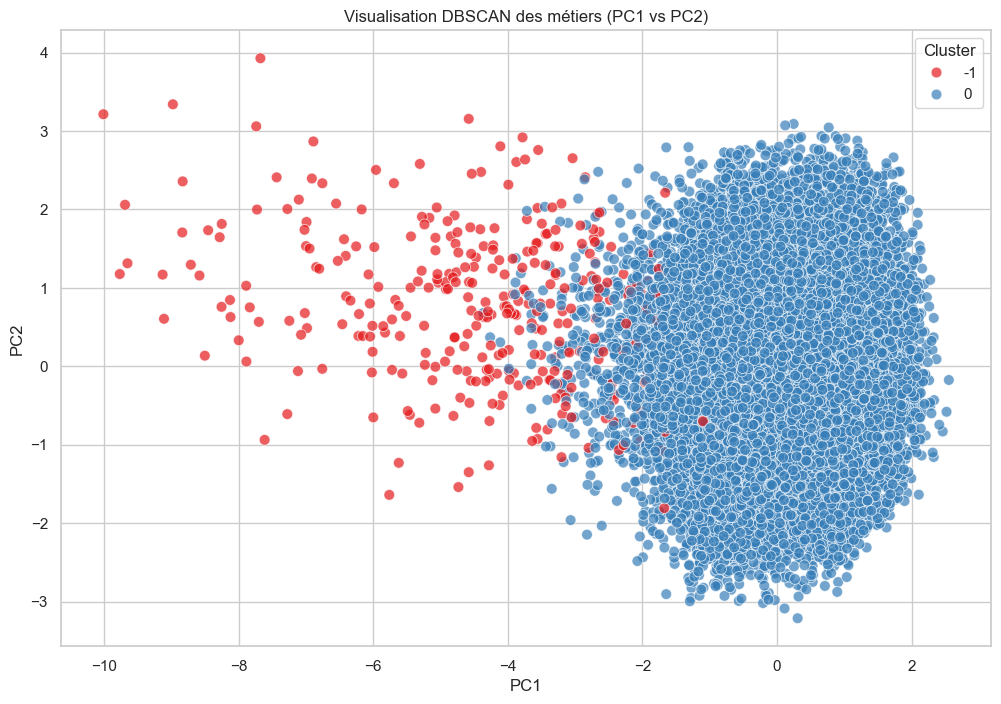

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Réduire les 6 features à 2 composantes pour la visualisation
pca_vis = PCA(n_components=2)
X_vis = pca_vis.fit_transform(X_scaled)  # X_scaled = features standardisées pour DBSCAN

plt.figure(figsize=(12,8))
sns.scatterplot(x=X_vis[:,0], y=X_vis[:,1], 
                hue=df_fe['DBSCAN_Cluster'], 
                palette='Set1', alpha=0.7, s=60)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Visualisation DBSCAN des métiers (PC1 vs PC2)')
plt.legend(title='Cluster')
plt.show()


In [ ]:
#clustering 

In [ ]:
DBSCAN 

In [51]:
X_country = df_fe[['Job_Growth_Rate_%', 'Automation_Risk_%', 'Median_Salary_USD']]


In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_country)


In [53]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=10)
df_fe['DBSCAN_Country_Cluster'] = dbscan.fit_predict(X_scaled)


In [54]:
# Moyenne de Job_Growth_Rate par cluster et par pays
country_summary = df_fe.groupby(['Location', 'DBSCAN_Country_Cluster'])['Job_Growth_Rate_%'].mean()
print(country_summary.sort_values(ascending=False))


Location   DBSCAN_Country_Cluster
Canada     -1                        8945.098039
Brazil     -1                        8505.769231
UK         -1                        8219.000000
India      -1                        8171.631408
China      -1                        8148.509434
Australia   0                         146.633155
Brazil      0                         143.516858
China       0                         142.720580
USA         0                         141.899924
India       0                         138.961402
Germany     0                         138.212545
Canada      0                         137.153955
UK          0                         117.611629
Name: Job_Growth_Rate_%, dtype: float64


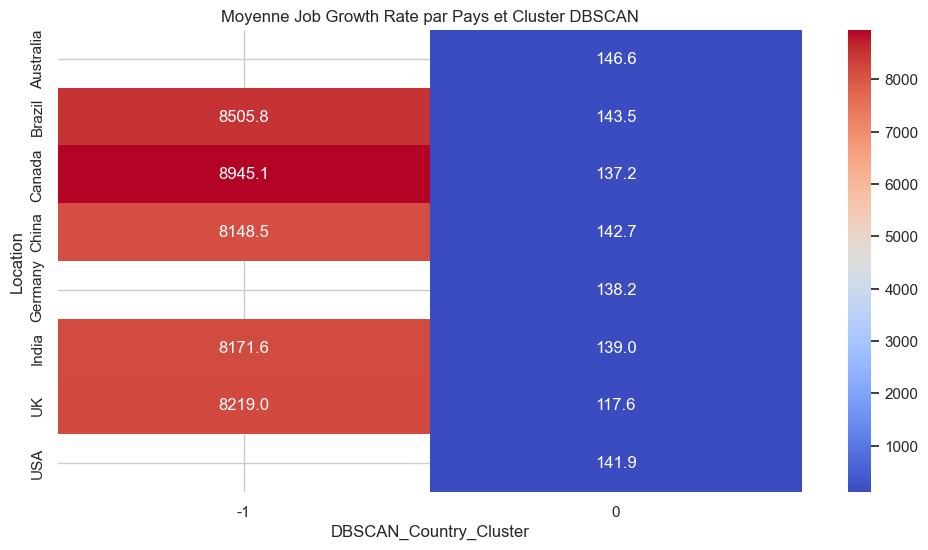

In [56]:
heatmap_data = df_fe.pivot_table(
    index='Location',
    columns='DBSCAN_Country_Cluster',
    values='Job_Growth_Rate_%',
    aggfunc='mean'
)

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Moyenne Job Growth Rate par Pays et Cluster DBSCAN')
plt.show()


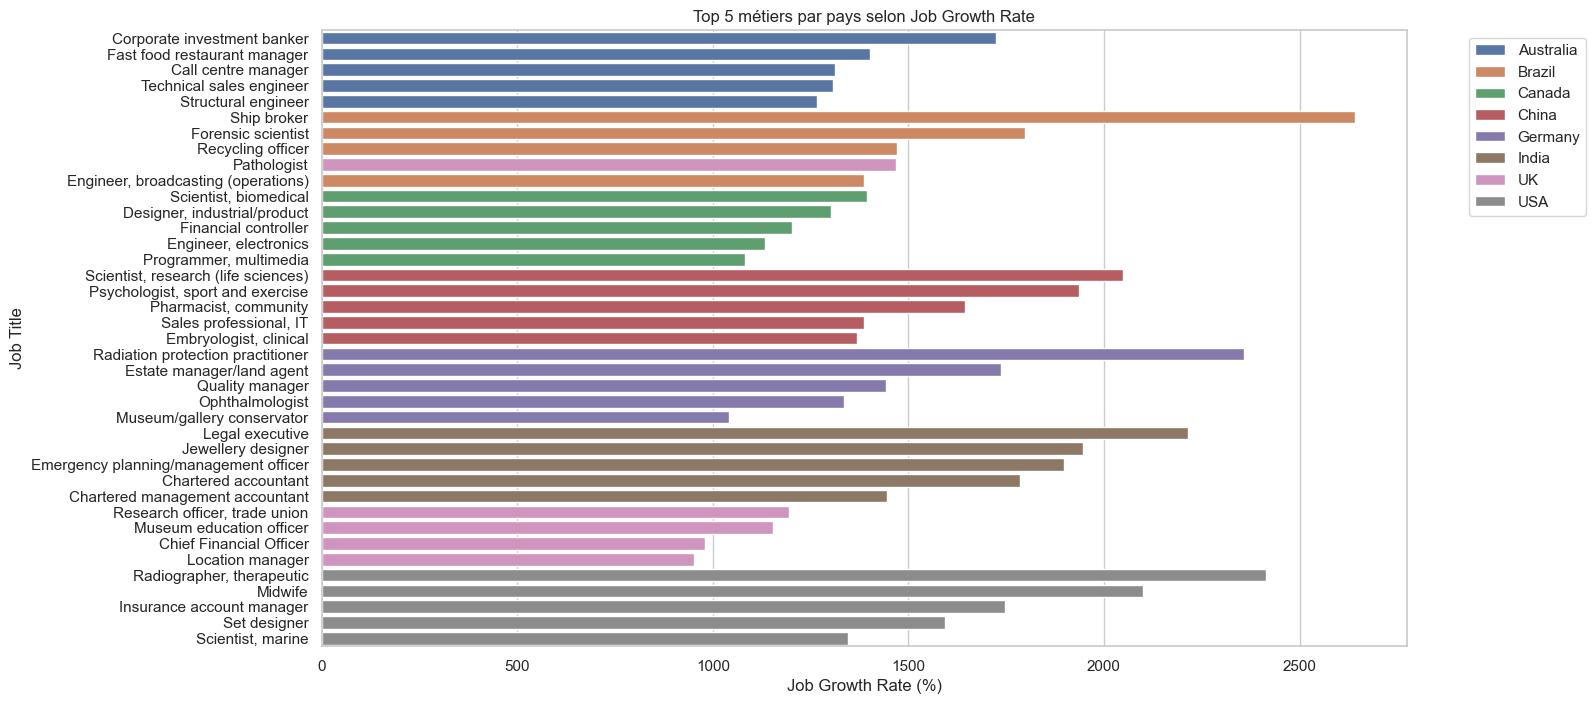

In [57]:
# Top 5 métiers par pays selon Job_Growth_Rate_%
top_jobs = df_fe.groupby(['Location','Job_Title'])['Job_Growth_Rate_%'].mean().reset_index()
top_jobs_sorted = top_jobs.sort_values(['Location','Job_Growth_Rate_%'], ascending=[True,False])
top5_jobs = top_jobs_sorted.groupby('Location').head(5)

plt.figure(figsize=(14,8))
sns.barplot(
    x='Job_Growth_Rate_%',
    y='Job_Title',
    hue='Location',
    data=top5_jobs,
    dodge=False
)
plt.title('Top 5 métiers par pays selon Job Growth Rate')
plt.xlabel('Job Growth Rate (%)')
plt.ylabel('Job Title')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()


In [59]:
# Moyennes par pays et cluster DBSCAN
country_cluster_summary = df_fe.groupby(['Location', 'DBSCAN_Country_Cluster'])[
    ['Job_Growth_Rate_%', 'Automation_Risk_%', 'Median_Salary_USD', 'Experience_Required_Years']
].mean().round(2)

print(country_cluster_summary)


                                  Job_Growth_Rate_%  Automation_Risk_%  \
Location  DBSCAN_Country_Cluster                                         
Australia  0                                 146.63              50.30   
Brazil    -1                                8505.77              26.20   
           0                                 143.52              50.12   
Canada    -1                                8945.10               8.34   
           0                                 137.15              50.24   
China     -1                                8148.51              43.23   
           0                                 142.72              49.85   
Germany    0                                 138.21              50.00   
India     -1                                8171.63              86.90   
           0                                 138.96              49.99   
UK        -1                                8219.00              95.67   
           0                          

In [60]:
# Métiers à forte croissance par pays
high_growth = df_fe[df_fe['Job_Growth_Rate_%'] > df_fe['Job_Growth_Rate_%'].quantile(0.9)]
high_growth.groupby('Location')['Job_Title'].value_counts().head(10)

# Métiers à forte décroissance par pays
low_growth = df_fe[df_fe['Job_Growth_Rate_%'] < df_fe['Job_Growth_Rate_%'].quantile(0.1)]
low_growth.groupby('Location')['Job_Title'].value_counts().head(10)


Location   Job_Title                          
Australia  Careers adviser                        4
           Higher education lecturer              4
           Museum/gallery curator                 4
           Psychologist, occupational             4
           Translator                             4
           Advice worker                          3
           Ergonomist                             3
           Exhibitions officer, museum/gallery    3
           Field seismologist                     3
           Geneticist, molecular                  3
Name: count, dtype: int64

In [61]:
top_jobs_by_country = df_fe.groupby(['Location', 'DBSCAN_Country_Cluster'])['Job_Title'] \
                            .value_counts() \
                            .groupby(level=0, group_keys=False) \
                            .head(5)

print(top_jobs_by_country)


Location   DBSCAN_Country_Cluster  Job_Title                                       
Australia   0                      Administrator, sports                               15
                                   Information officer                                 14
                                   Print production planner                            14
                                   Psychotherapist, child                              13
                                   Actuary                                             12
Brazil     -1                      Advice worker                                        1
            0                      Hotel manager                                       14
                                   Insurance broker                                    14
                                   Architectural technologist                          13
                                   Child psychotherapist                               13
Canada     -1   

In [62]:
country_cluster_summary = df_fe.groupby(['Location', 'DBSCAN_Country_Cluster'])[
    ['Job_Growth_Rate_%', 'Automation_Risk_%', 'Median_Salary_USD']
].mean().round(2)

print(country_cluster_summary)


                                  Job_Growth_Rate_%  Automation_Risk_%  \
Location  DBSCAN_Country_Cluster                                         
Australia  0                                 146.63              50.30   
Brazil    -1                                8505.77              26.20   
           0                                 143.52              50.12   
Canada    -1                                8945.10               8.34   
           0                                 137.15              50.24   
China     -1                                8148.51              43.23   
           0                                 142.72              49.85   
Germany    0                                 138.21              50.00   
India     -1                                8171.63              86.90   
           0                                 138.96              49.99   
UK        -1                                8219.00              95.67   
           0                          

In [64]:
for country in df_fe['Location'].unique():
    print(f"=== {country} ===")
    for cluster in df_fe['DBSCAN_Country_Cluster'].unique():
        subset = df_fe[(df_fe['Location']==country) & (df_fe['DBSCAN_Country_Cluster']==cluster)]
        if len(subset) == 0:
            continue
        top_jobs = [str(job) for job in subset['Job_Title'].value_counts().head(5).index.tolist()]
        mean_growth = subset['Job_Growth_Rate_%'].mean().round(2)
        mean_salary = subset['Median_Salary_USD'].mean().round(2)
        mean_risk = subset['Automation_Risk_%'].mean().round(2)
        print(f"Cluster {cluster}:")
        print(f"  Croissance moyenne : {mean_growth}%")
        print(f"  Salaire moyen : {mean_salary} USD")
        print(f"  Risque d'automatisation : {mean_risk}%")
        print(f"  Métiers principaux : {', '.join(top_jobs)}")
        print(f"  Interprétation : ...\n")


=== UK ===
Cluster 0:
  Croissance moyenne : 117.61%
  Salaire moyen : 90335.88 USD
  Risque d'automatisation : 50.26%
  Métiers principaux : Herpetologist, Therapist, sports, Psychiatric nurse, Surveyor, insurance, Designer, television/film set
  Interprétation : ...

Cluster -1:
  Croissance moyenne : 8219.0%
  Salaire moyen : 116298.84 USD
  Risque d'automatisation : 95.67%
  Métiers principaux : Administrator
  Interprétation : ...

=== USA ===
Cluster 0:
  Croissance moyenne : 141.9%
  Salaire moyen : 90438.5 USD
  Risque d'automatisation : 50.44%
  Métiers principaux : Surveyor, insurance, Surveyor, land/geomatics, Air traffic controller, Hydrogeologist, Warehouse manager
  Interprétation : ...

=== Canada ===
Cluster 0:
  Croissance moyenne : 137.15%
  Salaire moyen : 89712.7 USD
  Risque d'automatisation : 50.24%
  Métiers principaux : Scientist, physiological, Water engineer, Curator, Leisure centre manager, Engineer, structural
  Interprétation : ...

Cluster -1:
  Croissance

In [38]:
K_MEANS 

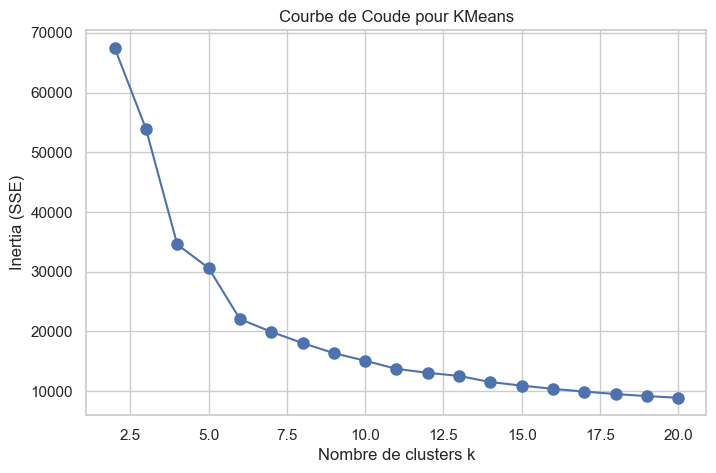

In [66]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Essai de plusieurs k
inertia = []
K_range = range(2, 21)  # tester k de 2 à 20

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Visualisation de la courbe de coude
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'bo-', markersize=8)
plt.xlabel("Nombre de clusters k")
plt.ylabel("Inertia (SSE)")
plt.title("Courbe de Coude pour KMeans")
plt.grid(True)
plt.show()


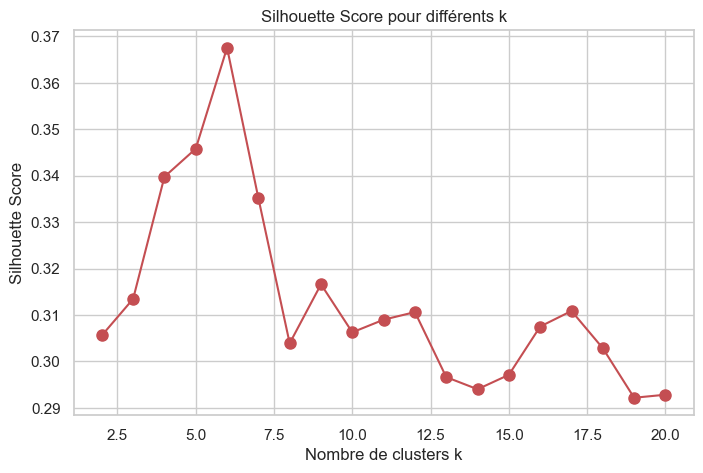

Meilleur k selon Silhouette Score : 6


In [67]:
from sklearn.metrics import silhouette_score

sil_scores = []
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)

plt.figure(figsize=(8,5))
plt.plot(K_range, sil_scores, 'ro-', markersize=8)
plt.xlabel("Nombre de clusters k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score pour différents k")
plt.grid(True)
plt.show()

best_k = K_range[sil_scores.index(max(sil_scores))]
print("Meilleur k selon Silhouette Score :", best_k)


In [68]:

kmeans = KMeans(n_clusters=best_k, random_state=42)
df_fe['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)


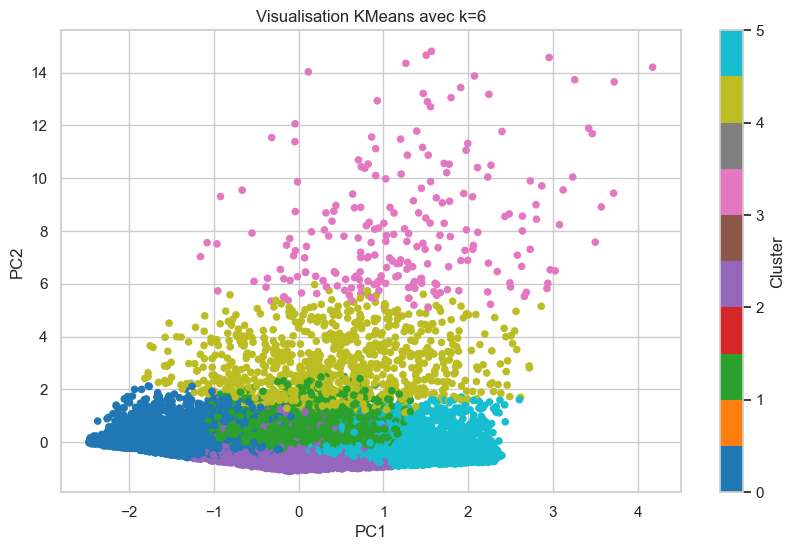

In [69]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df_fe['KMeans_Cluster'], cmap='tab10', s=20)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"Visualisation KMeans avec k={best_k}")
plt.colorbar(label="Cluster")
plt.show()


In [70]:
for country in df_fe['Location'].unique():
    print(f"=== {country} ===")
    for cluster in df_fe['KMeans_Cluster'].unique():
        subset = df_fe[(df_fe['Location'] == country) & (df_fe['KMeans_Cluster'] == cluster)]
        if len(subset) == 0:
            continue
        # Top 5 métiers du cluster
        top_jobs = [str(job) for job in subset['Job_Title'].value_counts().head(5).index.tolist()]
        # Moyennes des indicateurs
        mean_growth = subset['Job_Growth_Rate_%'].mean().round(2)
        mean_salary = subset['Median_Salary_USD'].mean().round(2)
        mean_risk = subset['Automation_Risk_%'].mean().round(2)
        
        # Affichage
        print(f"Cluster {cluster}:")
        print(f"  Croissance moyenne : {mean_growth}%")
        print(f"  Salaire moyen : {mean_salary} USD")
        print(f"  Risque d'automatisation : {mean_risk}%")
        print(f"  Métiers principaux : {', '.join(top_jobs)}")
        print(f"  Interprétation : ...\n")


=== UK ===
Cluster 0:
  Croissance moyenne : 43.81%
  Salaire moyen : 60982.1 USD
  Risque d'automatisation : 25.88%
  Métiers principaux : Therapist, sports, Counselling psychologist, Farm manager, Engineer, production, Engineer, site
  Interprétation : ...

Cluster 5:
  Croissance moyenne : 54.35%
  Salaire moyen : 120631.81 USD
  Risque d'automatisation : 75.29%
  Métiers principaux : Retail banker, Audiological scientist, Proofreader, Psychiatric nurse, Corporate treasurer
  Interprétation : ...

Cluster 2:
  Croissance moyenne : 47.38%
  Salaire moyen : 118826.58 USD
  Risque d'automatisation : 24.24%
  Métiers principaux : Engineer, communications, Chemical engineer, Engineer, biomedical, Theatre director, Trade mark attorney
  Interprétation : ...

Cluster 1:
  Croissance moyenne : 68.66%
  Salaire moyen : 60655.9 USD
  Risque d'automatisation : 75.36%
  Métiers principaux : Artist, Health and safety adviser, Surveyor, insurance, Automotive engineer, Education administrator
  In

In [ ]:
comparaison 

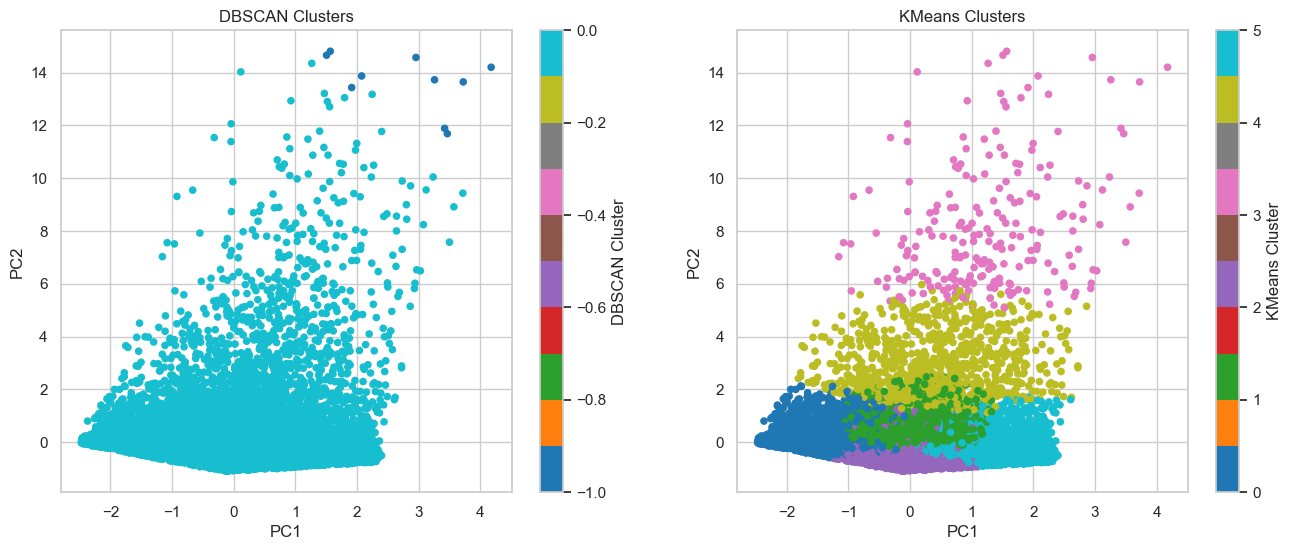

In [71]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

fig, axes = plt.subplots(1, 2, figsize=(16,6))

# ---- DBSCAN ----
scatter = axes[0].scatter(X_pca[:,0], X_pca[:,1], 
                          c=df_fe['DBSCAN_Country_Cluster'], cmap='tab10', s=20)
axes[0].set_title("DBSCAN Clusters")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")
fig.colorbar(scatter, ax=axes[0], label='DBSCAN Cluster')

# ---- KMeans ----
scatter2 = axes[1].scatter(X_pca[:,0], X_pca[:,1], 
                           c=df_fe['KMeans_Cluster'], cmap='tab10', s=20)
axes[1].set_title("KMeans Clusters")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")
fig.colorbar(scatter2, ax=axes[1], label='KMeans Cluster')

plt.show()


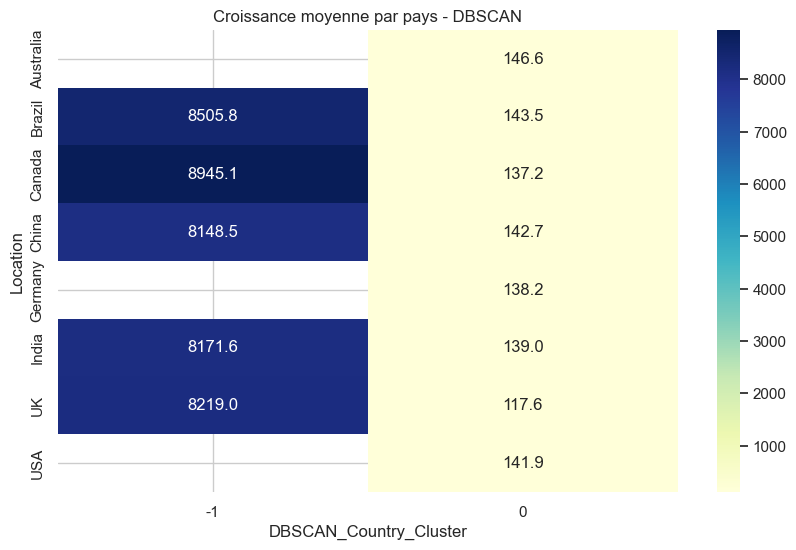

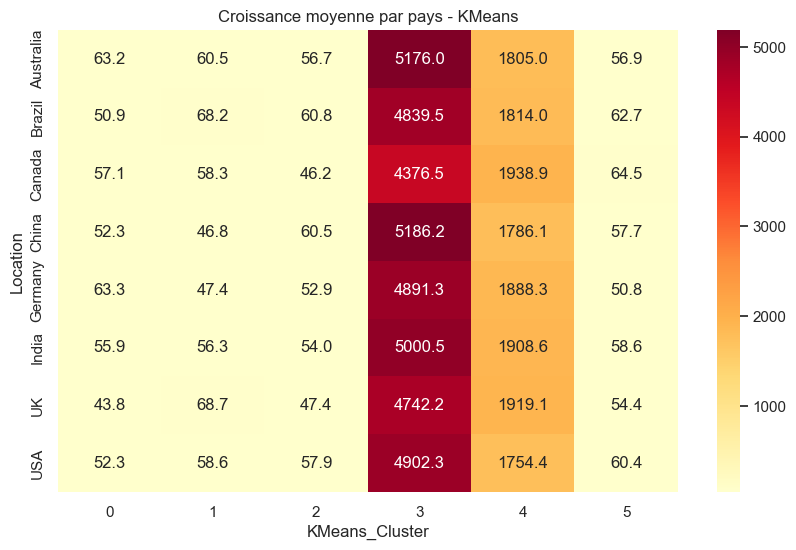

In [72]:
import seaborn as sns

# Exemple pour DBSCAN
heatmap_db = df_fe.groupby(['Location','DBSCAN_Country_Cluster'])['Job_Growth_Rate_%'].mean().unstack()
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_db, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Croissance moyenne par pays - DBSCAN")
plt.show()

# Exemple pour KMeans
heatmap_km = df_fe.groupby(['Location','KMeans_Cluster'])['Job_Growth_Rate_%'].mean().unstack()
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_km, annot=True, fmt=".1f", cmap="YlOrRd")
plt.title("Croissance moyenne par pays - KMeans")
plt.show()


In [73]:
top_jobs_km = df_fe.groupby('KMeans_Cluster')['Job_Title'].apply(lambda x: x.value_counts().head(3).index.tolist())
top_jobs_db = df_fe.groupby('DBSCAN_Country_Cluster')['Job_Title'].apply(lambda x: x.value_counts().head(3).index.tolist())

print("Top métiers KMeans par cluster:\n", top_jobs_km)
print("Top métiers DBSCAN par cluster:\n", top_jobs_db)


Top métiers KMeans par cluster:
 KMeans_Cluster
0    [Surveyor, land/geomatics, Environmental educa...
1    [Surveyor, insurance, Print production planner...
2    [Counselling psychologist, Administrator, Civi...
3    [Research officer, trade union, Pathologist, M...
4    [Librarian, public, Engineer, broadcasting (op...
5    [Audiological scientist, Journalist, magazine,...
Name: Job_Title, dtype: object
Top métiers DBSCAN par cluster:
 DBSCAN_Country_Cluster
-1    [Customer service manager, Psychologist, sport...
 0    [Surveyor, insurance, Counselling psychologist...
Name: Job_Title, dtype: object


In [ ]:
un seul graphique combiné “DBSCAN vs KMeans” où tu vois pays, croissance et clusters ensemble

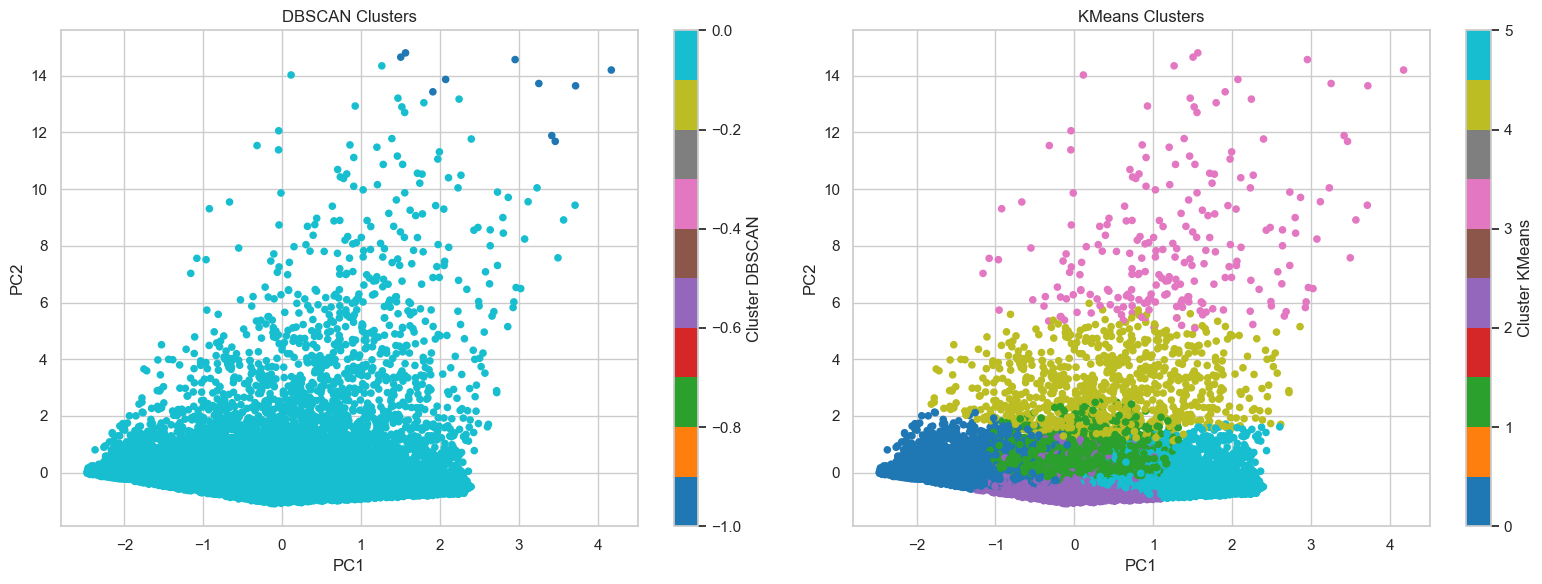

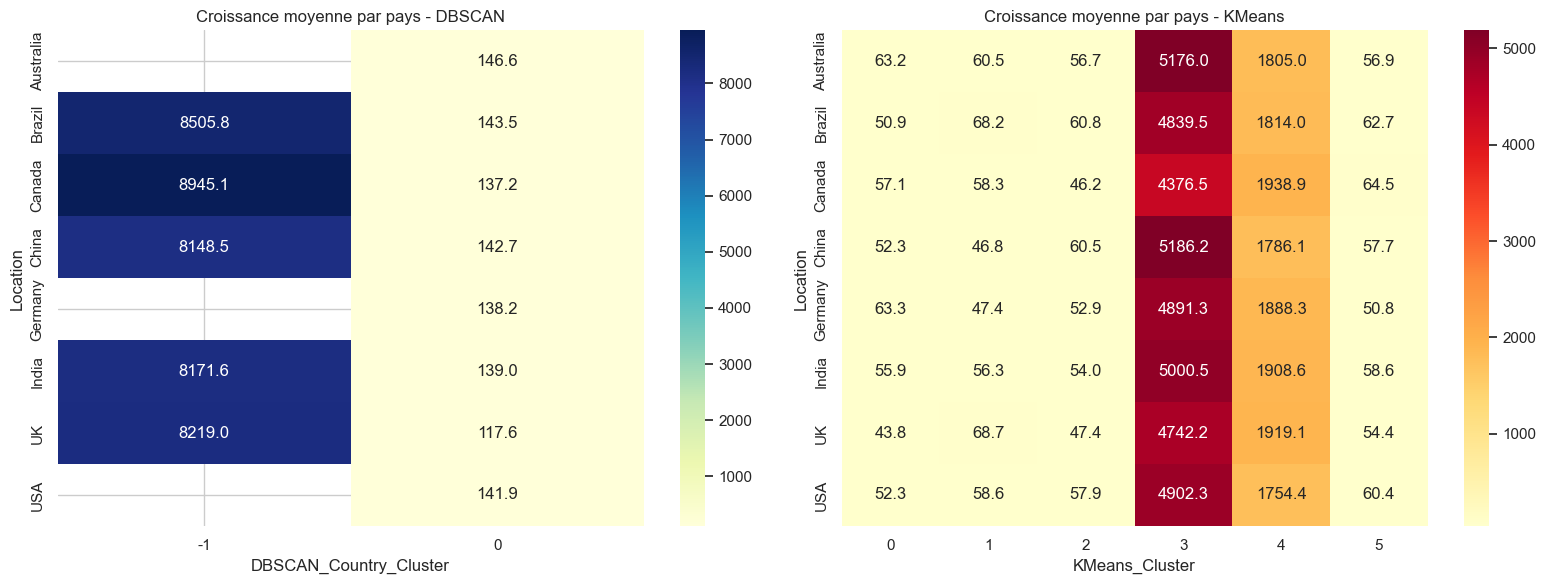

=== Top métiers DBSCAN par cluster ===
Cluster 0: ['Surveyor, insurance', 'Counselling psychologist', 'Charity officer', 'Surveyor, land/geomatics', 'Hydrogeologist']
Cluster -1: ['Customer service manager', 'Psychologist, sport and exercise', 'Advice worker', 'Jewellery designer', 'Paramedic']

=== Top métiers KMeans par cluster ===
Cluster 0: ['Surveyor, land/geomatics', 'Environmental education officer', 'Midwife', 'Insurance claims handler', 'Air traffic controller']
Cluster 5: ['Audiological scientist', 'Journalist, magazine', 'Engineer, production', 'International aid/development worker', 'Tax inspector']
Cluster 2: ['Counselling psychologist', 'Administrator, Civil Service', 'Air cabin crew', 'Designer, television/film set', 'Furniture designer']
Cluster 1: ['Surveyor, insurance', 'Print production planner', 'Water engineer', 'Speech and language therapist', 'Quarry manager']
Cluster 4: ['Librarian, public', 'Engineer, broadcasting (operations)', 'Chartered legal executive (Engl

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# PCA 2D pour réduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# ----------------- Figure 1 : Scatter PCA -----------------
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# DBSCAN
scatter1 = axes[0].scatter(X_pca[:,0], X_pca[:,1], 
                           c=df_fe['DBSCAN_Country_Cluster'], cmap='tab10', s=20)
axes[0].set_title("DBSCAN Clusters")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")
fig.colorbar(scatter1, ax=axes[0], label='Cluster DBSCAN')

# KMeans
scatter2 = axes[1].scatter(X_pca[:,0], X_pca[:,1], 
                           c=df_fe['KMeans_Cluster'], cmap='tab10', s=20)
axes[1].set_title("KMeans Clusters")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")
fig.colorbar(scatter2, ax=axes[1], label='Cluster KMeans')

plt.tight_layout()
plt.show()

# ----------------- Figure 2 : Heatmap croissance moyenne par pays -----------------
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# DBSCAN
heatmap_db = df_fe.groupby(['Location','DBSCAN_Country_Cluster'])['Job_Growth_Rate_%'].mean().unstack()
sns.heatmap(heatmap_db, annot=True, fmt=".1f", cmap="YlGnBu", ax=axes[0])
axes[0].set_title("Croissance moyenne par pays - DBSCAN")

# KMeans
heatmap_km = df_fe.groupby(['Location','KMeans_Cluster'])['Job_Growth_Rate_%'].mean().unstack()
sns.heatmap(heatmap_km, annot=True, fmt=".1f", cmap="YlOrRd", ax=axes[1])
axes[1].set_title("Croissance moyenne par pays - KMeans")

plt.tight_layout()
plt.show()

# ----------------- Figure 3 : Top métiers par cluster -----------------
print("=== Top métiers DBSCAN par cluster ===")
for cluster in df_fe['DBSCAN_Country_Cluster'].unique():
    top_jobs = df_fe[df_fe['DBSCAN_Country_Cluster']==cluster]['Job_Title'].value_counts().head(5)
    print(f"Cluster {cluster}: {top_jobs.index.tolist()}")

print("\n=== Top métiers KMeans par cluster ===")
for cluster in df_fe['KMeans_Cluster'].unique():
    top_jobs = df_fe[df_fe['KMeans_Cluster']==cluster]['Job_Title'].value_counts().head(5)
    print(f"Cluster {cluster}: {top_jobs.index.tolist()}")
